# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
s = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=130, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=130,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=260)

# Other Data

In [14]:
reer_cpi = read_prices("../../Dymon/Code Data/REER_PPI.csv")

In [15]:
reer_cpi.columns = [x[0] for x in reer_cpi.columns]

In [17]:
g10_reer_cpi = reer_cpi[[("JBDP"+x+" Index") for x in [x[3:] for x in G10_FX]]]
g10_reer_cpi.columns = G10_FX

In [18]:
g10_reer_cpi_cleaned = g10_reer_cpi.pipe(fill_date).pipe(omit_trailing_na).ffill()

# Signal 

In [19]:
def demean_pct(series, window, method="simple"):
  ma = rolling_mean(series, window, method=method, min_periods=window)
  return (series - ma)/ma

In [20]:
sig = g10_reer_cpi_cleaned.ffill().pipe(demean_pct, 252*3).pipe(cap_helper, 0.125).pipe(rolling_mean, 5) * -1

In [21]:
b = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = s)
b.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [22]:
bt_obj = b

In [23]:
get_summary(bt_obj)

Returns   : 0.031555584055750215
Vol       : 0.10828725934565715
SR        : 0.2914062489569854
Max DD    : -20.04
Hit rate  : 0.534
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.14


In [24]:
get_returns_stats(bt_obj.asset_rtn, b.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,0.347085,0.351639,-0.208433,-0.687016,2.521328,-0.405093,0.491377,0.372866,-0.262151
sharpe,0.121217,0.17966,-0.104869,-0.28099,0.542696,-0.143237,0.375541,0.149608,-0.122797
dollar_sharpe,0.103224,0.168003,-0.111881,-0.285672,0.524058,-0.148786,0.372052,0.137453,-0.129192
trade_sharpe,0.121217,0.17966,-0.104869,-0.28099,0.542696,-0.143237,0.375541,0.149608,-0.122797
long_sharpe,0.062733,0.32742,-0.164218,0.057494,0.823007,-0.264367,0.44166,0.367886,-0.409462
short_sharpe,0.16684,0.09514,-0.04897,-0.937805,-0.013311,-0.130359,0.383896,0.03852,0.027968
sortino,0.064977,0.101206,-0.055538,-0.15383,0.30686,-0.076396,0.213198,0.08386,-0.066973
max_drawdown,-7.424383,-7.439851,-12.232947,-18.739982,-8.917858,-16.54098,-4.090341,-5.962138,-14.256302
max_drawdown_start,2007-07-25,2008-10-27,2010-06-07,2010-05-18,2007-06-22,2005-03-18,2011-04-28,2008-05-21,2011-08-09
max_drawdown_end,2010-07-19,2014-07-01,2014-08-26,2016-09-06,2008-04-11,2016-12-23,2014-04-30,2010-06-07,2016-12-15


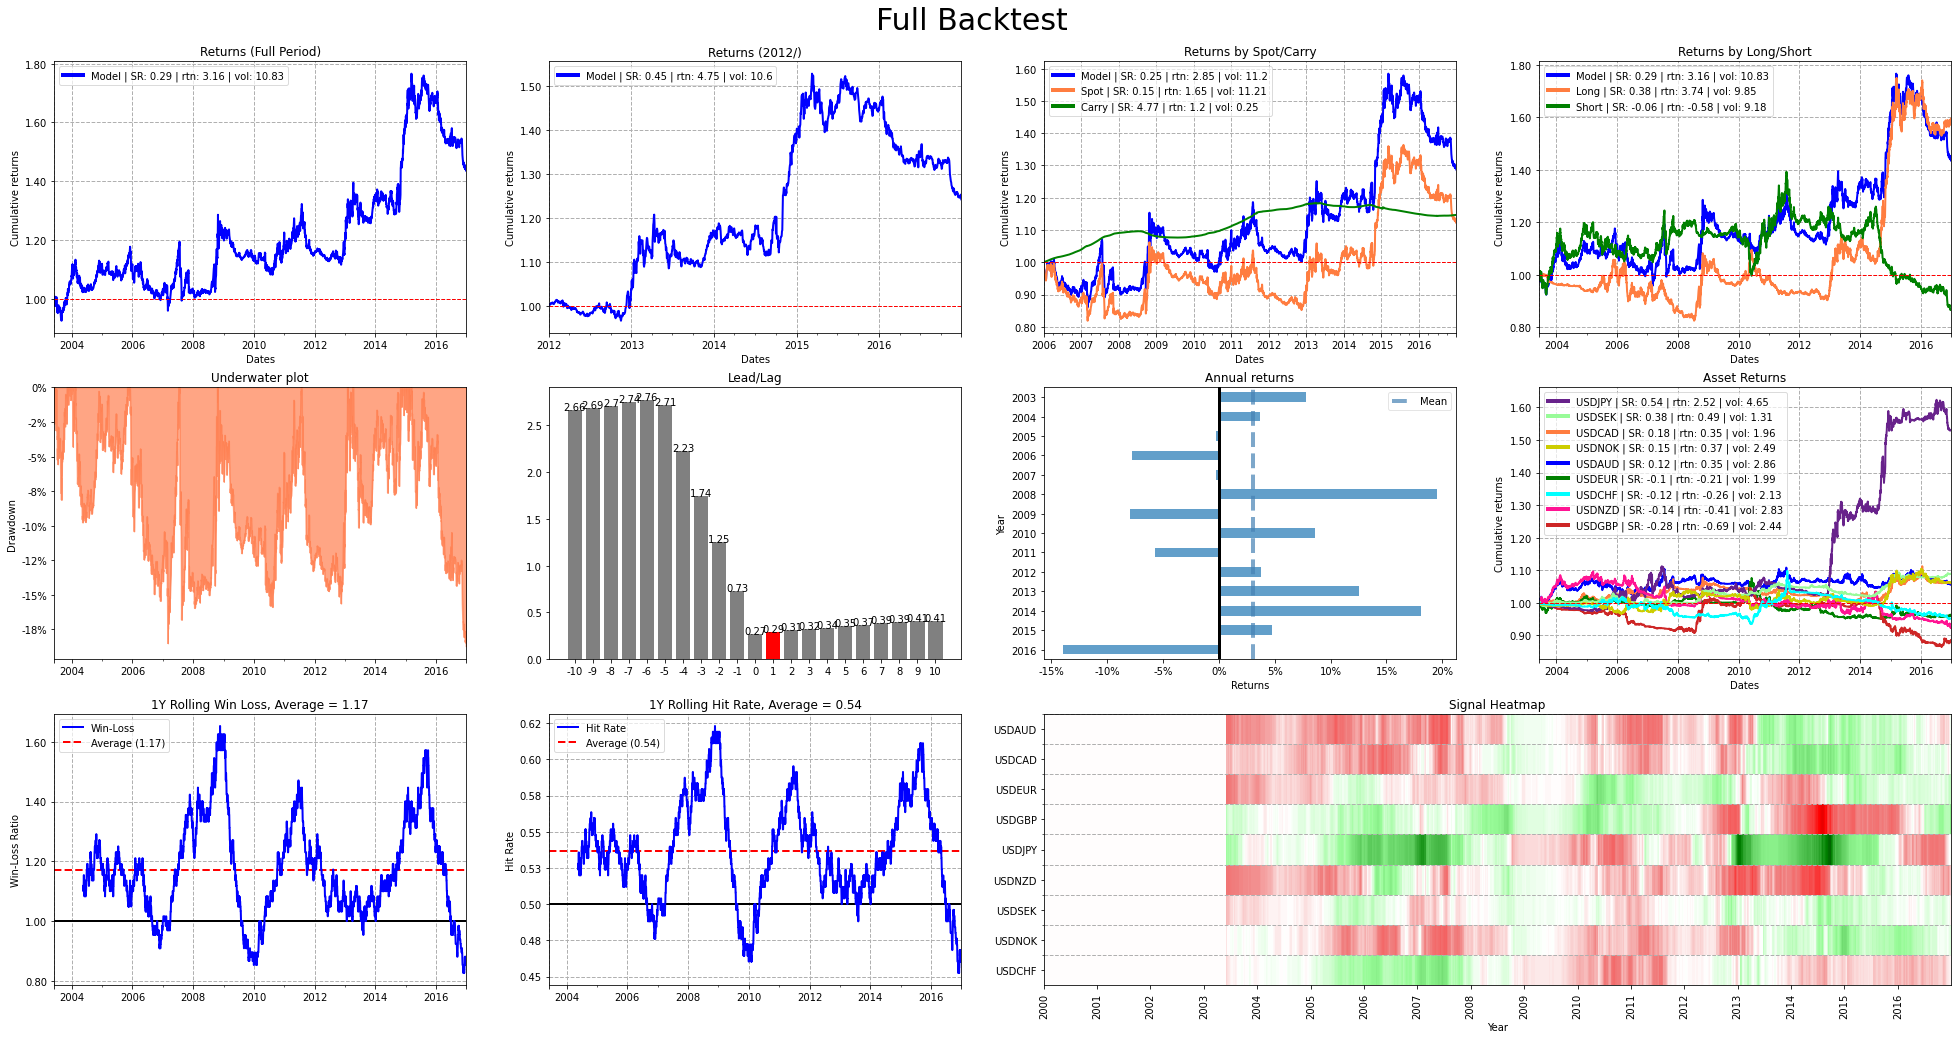

In [25]:
plot_bt(bt_obj)